# Домашняя работа №1

[ 0 -1  1 ... -1  1 -1]
Почему?: (1001,)
-561.0
19.0


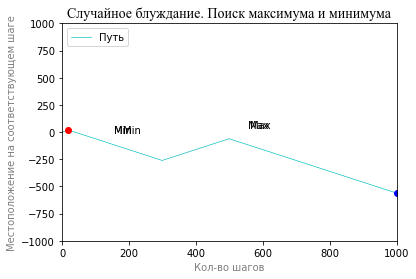

11
1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
500
500
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1

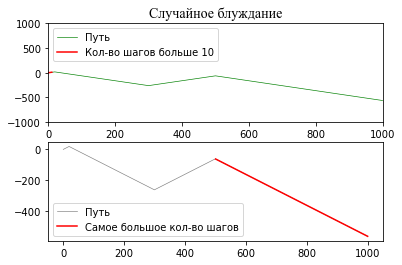

In [6]:
# Пункт 1. Максимум и минимум 

# Загрузка необходимых пакетов
import numpy as np
import matplotlib.pyplot as plt

# Фиксируем зерно
np.random.seed(42)

# Определяем начальную точку пути
begin = np.array(0)

# Рандомизируем шаги
step = np.random.choice([-1,1], size=1000, replace=True, p=[0.5,0.5])


# Создаем путь
put = np.hstack((begin, step))
put1 = put.cumsum()              # местоположение
print(put)                       # ориентир того, куда нужно топать
print("Почему?:", put.shape)


### мой тест

my_list = np.zeros(1000)
my_list[1:20] = 1
my_list[20:50] = -1
my_list[50:100] = -1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

put1 = np.cumsum(my_list)
put = my_list



# Теперь найдем максимумы и минимумы
minimum = put1.min()
print(minimum)
maximum = put1.max()
print(maximum)

# Определим их координаты
x_min = np.array(np.where(put1 == minimum))
x_max = np.array(np.where(put1 == maximum))
y_min = np.full(x_min.shape,minimum)
y_max = np.full(x_max.shape, maximum)

# Посмотрим на график блужданий

# plt.axis([0,1000,-20,40])   плохо! почему не max и min ?
plt.axis([0,1000,-1000,1000])


plt.title('Случайное блуждание. Поиск максимума и минимума', fontsize=14, fontname='Times New Roman')
plt.xlabel('Кол-во шагов', color='gray')
plt.ylabel('Местоположение на соответствующем шаге',color='gray')
plt.text(154,-12.5,'Min')
plt.text(156,-13.5,'Min')
plt.text(182,-14.5,'Min')
plt.text(555,37.5,'Max')
plt.text(561,38.5,'Max')
plt.plot(put.cumsum(), color = 'c',linewidth = 0.65) 
plt.plot(x_min,y_min,'ro', color = 'blue')
plt.plot(x_max,y_max, 'ro', color = 'red')
plt.legend(['Путь'],loc =2)
#### plt.show ошибка
plt.show()   





# Пункт 2. Индекс, с которого будет сделано выше 10 шагов

count = 0 # текущий счетчик
ten_c = 0 # счетчик фиксации 
znach = 0 # cчетчик индекса последнего в ряду шагов шага
for j in range(len(put)):
    if put[j-1] == put[j]:
        count = count + 1
        new = count + 1
        if new > 10:
            ten_c = new
            znach = j + 1
            break
    else:
        count = 0
znach1 = znach - ten_c
print(ten_c) # длина пути в 1 сторону
print(znach1) # индекс, с которого будет сделано свыше 10 шагов в 1 сторону
print(put[znach1:znach]) # cам путь

# Для графика
doroga = np.array(range(znach1,znach,1)) # абциссы пути


# plt.axis([0,1000,-20,40])   плохо! почему не max и min ?
plt.axis([0,1000,-1000,1000]);

plt.title('Случайное блуждание', fontsize=14, fontname='Times New Roman')
plt.subplot(211)
plt.plot(put.cumsum(), color = 'green',linewidth = 0.65) 
plt.plot(doroga,put1[znach1:znach], color = 'red')
plt.legend(['Путь','Кол-во шагов больше 10'], loc = 2)




# Пункт 3. Индекс, c которого будет сделано максимальное число шагов в одну сторону

counter = 0  #  текущий cчетчик
max_s = 0    # cчетчик максимального числа шагов
ind = 0      # счетчик индекса последнего шага, при котором зафисировано максимальное число шагов

for i in range(len(put)):
    if put[i-1] == put[i]:
        counter = counter + 1
        if counter > max_s:
            max_s = counter  
            ind = i + 1 
    else:
        counter = 0 
maxi_s = max_s + 1 
index = ind - maxi_s 
print(maxi_s) # длина максимального пути
print(index)  # индекс, с которого будет сделано максимальное число шагов в 1 сторону
print(put[index:ind]) # cам путь


# График
line = np.array(range(index,ind,1)) # абциссы пути



# plt.axis([0,1000,-20,40])   плохо! почему не max и min ?
plt.axis([0,1000,-1000,1000])

plt.title('Случайное блуждание', fontsize=14, fontname='Times New Roman')
plt.subplot(212)
plt.plot(put.cumsum(), color = 'grey',linewidth = 0.65) 
plt.plot(line,put1[index:ind], color = 'red')
plt.legend(['Путь', 'Cамое большое кол-во шагов'], loc = 0)
#### plt.show ошибка
plt.show()
